# Rzadkie wektory i macierze
* [Bardzo fajny wykład na Ważniaku](http://wazniak.mimuw.edu.pl/index.php?title=MN08)
* [Opis formatów zapisu rzadkich macierzy w cuSPARSE](http://docs.nvidia.com/cuda/cusparse/index.html#cusparse-indexing-and-data-formats)
* https://en.wikipedia.org/wiki/Sparse_matrix

### Pytania:
* po co stosujemy?
* w jakich problemach pojawiają się rzadkie macierze?

### Zadania:
* zaimplementować struktury danych przechowujące rzadkie wektory i macierze (format dowolny)
* zaimplementować podstawowe operacje na wektorach (dodawanie, mnożenie przez skalar, przez wektor)
* zaimplementować podstawowe operacje ma macierzach (dodawanie, mnożenie przez skalar, przez wektor, przez macierz)

In [23]:
# rzadkie macierze
x = 2
y = 3
A = zeros(Float64, x, y)
A[1,1] = 5
A[2,3] = 10
nnz = 2
function toSpare(A,x,y,nnz)
    I = zeros(Int8,nnz,1)
    J = zeros(Int8,nnz,1)
    V = zeros(Float64,nnz,1)
    index = 1
   for i = 1:x 
        for j = 1:y
            if(A[i,j] != 0)
                I[index] = i
                J[index] = j
                V[index] = A[i,j]
                index = index + 1      
            end
        end
    end
    (I,J,V)
end

tmp = toSpare(A,x,y,nnz)

tmp
(_,_,V) = tmp
V

2×1 Array{Float64,2}:
  5.0
 10.0

In [25]:
# rzadkie wektory
function toSparse(A,x,nnz)
    I = zeros(Int8,nnz,1)
    V = zeros(Float64,nnz,1)
    index = 1
    for i = 1:x
        if(A[i] != 0)
            I[index] = i
            V[index] = A[i]
            index = index + 1
        end
    end
    (I,V)
end
x2 = 4
y2 = 1

A2 = zeros(Float64, x2, y2)
A2[1] = 5
A2[2] = 10
nnz2 = 2

toSparse(A2,x2,nnz2)

(Int8[1; 2], [5.0; 10.0])

In [26]:
# mnozenie macierzy przez skalar
function mulMatrixSparseByFactor(A,nnzA,factor)
    (I,J,V) = A
    for i = 1:nnzA
        V[i] = V[i]*factor
    end
    (I,J,V)
end

mulMatrixSparseByFactor((I,J,V),nnz,2)

(Int8[1; 2], Int8[1; 3], [10.0; 20.0])

In [30]:
# mnozenie wektor przez skalar

function mulVectorSparseByFactor(A,nnzA,factor)
    (I,V) = A
    for i = 1:nnzA
        V[i] = V[i]*factor
    end
    (I,V)
end

mulVectorSparseByFactor(toSparse(A2,x2,nnz2),nnz2,2)

(Int8[1; 2], [10.0; 20.0])

# Iteracyjne rozwiązywanie układów równań liniowych

* Czytanka: Kincaid, Cheney rozdział 8.2. Iterative Solutions of Linear Systems, str. 319
* Metody: Jacobiego, Gaussa-Seidla, SOR, Conjugate Gradient

### Po co stosujemy?
* wielkie systemy, które trudno rozwiązać analitycznie (lub jest to wręcz niemożliwe)
* rzadkie macierze
* coś jeszcze?

### Zadania:
* zadanie wstępne: zaimplementować [metodę Netwona](https://en.wikipedia.org/wiki/Newton%27s_method) znajdywania zer funkcji rzeczywistych
* zaimplementować dowolną metodę iteracyjną rozwiązywania układów równań liniowych
* przetestować powyższą metodę dla wygenerowanych macierzy (2x2, 3x3, 4x4) i sprawdzić jej poprawność
* sprawdzić, jak liczba iteracji wpływa na dokładność wyniku (wykres jest bardzo dogodną reprezentacją tego wyniku)
* (*) porównać zbieżność metod: Jacobiego, Gaussa-Seidla, SOR i Conjugate Gradient

In [85]:
# metoda Newtona

function newtonMethod(f, fp, x)
 xnew, xold = x, Inf
 fn, fo = f(xnew), Inf
 tol = 1e-14
 ctr = 1
 while (ctr < 100) && (abs(xnew - xold) > tol) && ( abs(fn - fo) > tol )
   x = xnew - f(xnew)/fp(xnew)
   xnew, xold = x, xnew
   fn, fo = f(xnew), fn
   ctr = ctr + 1
 end
 if ctr == 100
    error("Did not converge in 100 steps")
 else
   (xnew, ctr)
 end 
end

f(x) = x^2-1
fp(x) = 2x
newtonMethod(f, fp, 1.2)

(1.0, 6)

In [2]:
# metoda jacob'iego
function jacobi(A,b,n,iteration)
    inversedQ = zeros(Float64, n, n)
    oldX = zeros(Float64,n,1)
    R = A
    for i = 1:n
        inversedQ[i,i] = 1/A[i,i]
        R[i,i] = 0
    end
    B = -inversedQ*R
    h = inversedQ*b
    newX = oldX
    for i = 1:iteration
        newX = B*oldX + h 
        oldX = newX
    end
    newX
end

n = 3
A = zeros(Float64, n, n)
b = zeros(Float64,n,1)
A[1,1] = 2
A[1,2] = -1
A[2,1] = -1
A[2,2] = 3
A[2,3] = -1
A[3,2] = -1
A[3,3] = 2
b[1] = 1
b[2] = 8
b[3] = -5
jacobi(A,b,n,10000)

A2 = zeros(Float64, 2, 2)
A2[1,1] = 2
A2[1,2] = 1
A2[2,1] = 5
A2[2,2] = 7

b2 = zeros(Float64,2,1)
b2[1] = 11
b2[2] = 13

jacobi(A2,b2,2,10000) # wynik zgadza sie z wynikiem z wikipedi

2×1 Array{Float64,2}:
  7.111111111111111 
 -3.2222222222222214

┌ Info: Recompiling stale cache file /mnt/juliabox/.julia/compiled/v1.0/Plots/ld3vC.ji for Plots [91a5bcdd-55d7-5caf-9e0b-520d859cae80]
└ @ Base loading.jl:1190


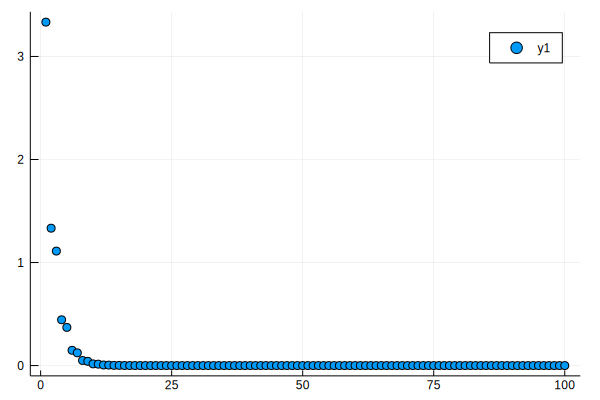

In [5]:
# dokladnosc metody od ilosci iteracji

n = 3
A = zeros(Float64, n, n)
b = zeros(Float64,n,1)
A[1,1] = 2
A[1,2] = -1
A[2,1] = -1
A[2,2] = 3
A[2,3] = -1
A[3,2] = -1
A[3,3] = 2
b[1] = 1
b[2] = 8
b[3] = -5

pomiary = zeros(Float64,100,1)

solution = [2,3,-1]
for i = 1:100
    result = jacobi(A,b,n,i)
    A[1,1] = 2
    A[1,2] = -1
    A[2,1] = -1
    A[2,2] = 3
    A[2,3] = -1
    A[3,2] = -1
    A[3,3] = 2
    error = 0
    for j = 1:3
        error = error + abs(result[j]-solution[j])
    end
    pomiary[i] = error
end

using Plots
scatter(1:100,pomiary)